# Visualizing Pfizer Vaccine Tweets

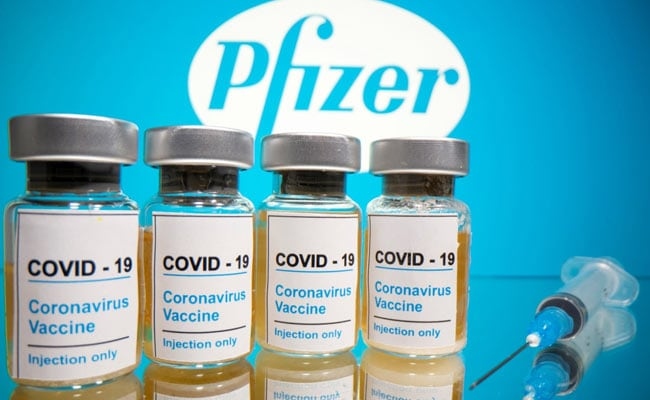

### Load all the required libraries

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 
import nltk
import re
import string

from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob
import re
from collections import Counter

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Markdown as md


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


### Load the dataset

In [ ]:
tweets = pd.read_csv("/kaggle/input/pfizer-vaccine-tweets/vaccination_tweets.csv")

In [ ]:
tweets.head()

In [ ]:
tweets.info()

In [ ]:
tweets.describe()

In [ ]:
#Number of rows and columns in the dataset
print("There are {} rows and {} columns in the dataset.".format(tweets.shape[0],tweets.shape[1]))

## Visualization

### 1. Word cloud

In [ ]:
text = ",".join(review for review in tweets.text if 'COVID' not in review and 'https' not in review and 'Covid' not in review)
wordcloud = WordCloud(max_words=200, colormap='Set2',background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.title('Prevalent words in tweets',fontsize=19)
plt.show()

### Number of Tweets by location(Top 10)

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(tweets["user_location"].value_counts().values[0:10],
            tweets["user_location"].value_counts().index[0:10]);
plt.title("Top 10 Countries with maximum tweets",fontsize=14)
plt.xlabel("Number of tweets",fontsize=14)
plt.ylabel("Country",fontsize=14)
plt.show()

### 3. Heatmap representation of missing values

In [ ]:
plt.figure(figsize=(15, 6))
sns.heatmap(tweets.isnull(), cbar=True, cmap='Paired_r')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

### 4. Bar plot of unique values in each column

In [ ]:
def unique_values_funct(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

udf = unique_values_funct(tweets)

f, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x=udf['Features'], y=udf['Uniques'], alpha=0.8)
plt.title('Bar plot for unique values in each column', fontsize=14)
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Columns', fontsize=14)
plt.xticks(rotation=90)
plt.show()

### 5. Distribution of words in text column

In [ ]:
tweets["num of words in text"] = tweets["text"].apply(lambda x: len(x))
plt.figure(figsize=(10,7))
sns.kdeplot(tweets["num of words in text"],shade=True, color='m')
plt.title("Distribution of words in text column")
plt.xlabel("Number of words")
plt.show()

### 6. Users with maximum tweets(Top 20)

In [ ]:
username_count = tweets['user_name'].value_counts().reset_index().rename(columns={
    'user_name':'tweet_count','index':'user_name'})

plt.figure(figsize=(8, 10))
sns.barplot(y='user_name',x='tweet_count',tweets=username_count.head(10))
y=username_count['tweet_count'].head(20)
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Users with maximum tweets',weight='bold', size=13)
plt.ylabel('Username', size=12, weight='bold')
plt.xlabel('TweetCount', size=12, weight='bold')
plt.show()

### 7. Plot verified users account


In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x ="user_verified",data=tweets, palette="Set1")
plt.title("Verified user accounts or not ?")
plt.xticks([False,True],['Unverified','Verified'])
plt.show()

### 8. Plot platform with maximum number of tweets¶


In [ ]:
plt.figure(figsize=(15,5))
src = tweets['source'].value_counts().sort_values(ascending=False)
source = src.head(10)
source.plot.bar(color=['red', 'green', 'blue', 'black','cyan','pink','purple','violet','yellow','orange'])
plt.title('Platform with maximum number of tweets',size=13)
plt.xlabel('User Platform',size=13)
plt.ylabel('Tweet Count',size=13)
plt.show()

#### 8.1> Most Tweet Sources used in India

In [ ]:
pla = tweets['source'][tweets['user_location'] == 'India'].value_counts().sort_values(ascending=False)
explode = (0, 0.1, 0, 0,0.01) 
plt.figure(figsize=(8,8))
pla[0:5].plot(kind = 'pie', title = 'Most Tweet Sources used in India', autopct='%1.1f%%',shadow=True,explode = explode)
plt.show()

#### 8.2> Most Tweet Sources used in Malaysia

In [ ]:
pla = tweets['source'][tweets['user_location'] == 'Malaysia'].value_counts().sort_values(ascending=False)
explode = (0, 0.1) 
plt.figure(figsize=(8,8))
pla[0:2].plot(kind = 'pie', title = 'Most Tweet Sources used in Malaysia', autopct='%1.1f%%',shadow=True,explode = explode)
plt.show()

#### 8.3> Most Tweet Sources used in United States

In [ ]:
pla = tweets['source'][tweets['user_location'] == 'United States'].value_counts().sort_values(ascending=False)
explode = (0, 0.1, 0, 0) 
plt.figure(figsize=(8,8))
pla[0:4].plot(kind = 'pie', title = 'Most Tweet Sources used in United States', autopct='%1.1f%%',shadow=True,explode = explode)
plt.show()

### 9. Plot top 5 hashtags

In [ ]:
top_tags=tweets['hashtags'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,8))
explode = (0, 0.1, 0, 0,0.01) 

top_tags[0:5].plot(kind = 'pie',title = 'Top 5 hashtags',autopct='%1.1f%%',shadow=True,explode = explode)

### 10. Day with most number of tweets

In [ ]:
tweets["date"] = pd.to_datetime(tweets["date"])
tweets["Month"] = tweets["date"].apply(lambda x : x.month)
tweets["day"] = tweets["date"].apply(lambda x : x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
tweets["day"] = tweets["day"].map(dmap)
plt.title("Day with maximun tweets")
sns.countplot(tweets["day"])

### 11. is_retweet?

In [ ]:
y = tweets['is_retweet']
fig, ax = plt.subplots(figsize=(7, 7))
count = Counter(y)
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('is_retweet?')
plt.show()

### 12. Plot correlation between features

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(tweets.drop(columns=['id','is_retweet']).corr(), square=True, annot=True)
plt.show()